In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# EDA

## Data Cleaning


In [94]:
df=pd.read_csv('Bengaluru_House_Data.csv')
df.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


In [95]:
df[df['society'] == 'Brway G']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.0
107,Built-up Area,Ready To Move,Rajaji Nagar,3 BHK,Brway G,1640,3.0,2.0,229.0
965,Super built-up Area,Ready To Move,Rajaji Nagar,3 BHK,Brway G,1725,3.0,3.0,200.0
1931,Super built-up Area,Ready To Move,Rajaji Nagar,3 BHK,Brway G,1640,3.0,3.0,223.0
3062,Super built-up Area,Ready To Move,Rajaji Nagar,3 BHK,Brway G,1800,3.0,3.0,260.0
3100,Super built-up Area,Ready To Move,Rajaji Nagar,3 BHK,Brway G,1640,3.0,2.0,241.0
3118,Super built-up Area,Ready To Move,Rajaji Nagar,2 BHK,Brway G,1370,2.0,1.0,170.0
5313,Built-up Area,Ready To Move,Rajaji Nagar,2 BHK,Brway G,1440,2.0,2.0,170.0
5595,Super built-up Area,Ready To Move,Rajaji Nagar,2 BHK,Brway G,1440,2.0,2.0,185.0
5799,Super built-up Area,Ready To Move,Rajaji Nagar,3 BHK,Brway G,1640,3.0,3.0,230.0


In [96]:
df.shape

(13320, 9)

In [97]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [99]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [100]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [101]:
df2=df.drop(['society','balcony'],axis=1)

In [102]:
df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x,str) else np.nan)
df2=df2.dropna(subset=['bhk'])
df2['bhk'] = df2['bhk'].astype(int)
df2=df2.drop(['size','availability'],axis=1)

In [103]:
# df2['availability'].value_counts()
df2.columns

Index(['area_type', 'location', 'total_sqft', 'bath', 'price', 'bhk'], dtype='object')

In [104]:
# def availability_to_days(x, reference_date=datetime(2025, 10, 16)):
#     if x == "Ready To Move":
#         return 0
#     try:
#         day_str, month_str = x.split('-')
#         day = int(day_str)
#         month = datetime.strptime(month_str, "%b").month
#         year = reference_date.year
        
#         if month < reference_date.month or (month == reference_date.month and day < reference_date.day):
#             year += 1
        
#         dt = datetime(year, month, day)
#         return (dt - reference_date).days
#     except:
#         return None


In [105]:
# df['days_to_availability'] = df['availability'].apply(availability_to_days)
# df = df.dropna(subset=['days_to_availability'])
# df=df.drop('availability',axis=1)
# df[['days_to_availability']].min()


In [106]:
df2.head()

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,51.00,2


In [107]:
print(df2['area_type'].unique())
print(f'area_type is lenght of {len(df['area_type'].unique())}')

['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
area_type is lenght of 4


In [108]:
df3=df2.dropna()
df3.isnull().sum()

area_type     0
location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [109]:
def check_totalsqft(x):
    try:
        float(x)
    except:
        return False
    return True
    # print('No Error Found')

In [110]:
df3[~df3['total_sqft'].apply(check_totalsqft)].value_counts()

area_type             location            total_sqft      bath  price    bhk
Super built-up  Area  Whitefield          2830 - 2882     5.0   154.500  4      2
Built-up  Area        7th Phase JP Nagar  120Sq. Yards    2.0   51.000   2      1
                      Arekere             4125Perch       9.0   265.000  9      1
                      Bannerghatta Road   315Sq. Yards    5.0   260.000  4      1
                      1st Phase JP Nagar  78.03Sq. Meter  1.0   63.000   1      1
                                                                               ..
Super built-up  Area  Yelahanka           2806 - 3019     6.0   125.500  4      1
                                          629 - 1026      1.0   42.535   1      1
                      Yeshwanthpur        1250 - 1305     2.0   95.815   2      1
                                          540 - 670       1.0   41.745   1      1
                                          704 - 730       2.0   49.475   2      1
Name: count, Length: 

In [111]:
import re
df4=df3.copy()

def convert_to_sqft(x):
    try:
        x = str(x).strip()
        
        # Handle ranges like "2830 - 2882"
        if '-' in x:
            nums = re.findall(r"[\d.]+", x)
            if len(nums) == 2:
                return (float(nums[0]) + float(nums[1])) / 2
            else:
                return None
        
        # Handle numbers with units
        match = re.match(r"([\d.]+)\s*(Sq\.? ?Yards|Sq\.? ?Meter|Perch|Acres|Ground|Guntha)?", x, re.I)
        if match:
            value, unit = match.groups()
            value = float(value)
            if unit:
                unit = unit.lower().replace(" ", "")
                if "sqyards" in unit:
                    value *= 9
                elif "sqmeter" in unit:
                    value *= 10.7639
                elif "perch" in unit:
                    value *= 272.25
                elif "acres" in unit:
                    value *= 43560
                elif "ground" in unit:
                    value *= 2400
                elif "guntha" in unit:
                    value *= 108
            return value
        
        # Handle plain numbers
        return float(x)
    except:
        return None


df4['total_sqft_numeric'] = df3['total_sqft'].apply(convert_to_sqft)
df4=df4.drop('total_sqft',axis=1)
display(df4[['total_sqft_numeric']])


,total_sqft_numeric
0,1056.0
1,2600.0
2,1440.0
3,1521.0
4,1200.0
...,...
13315,3453.0
13316,3600.0
13317,1141.0
13318,4689.0


In [112]:
df4.head()

,area_type,location,bath,price,bhk,total_sqft_numeric
0,Super built-up Area,Electronic City Phase II,2.0,39.07,2,1056.0
1,Plot Area,Chikka Tirupathi,5.0,120.00,4,2600.0
2,Built-up Area,Uttarahalli,2.0,62.00,3,1440.0
3,Super built-up Area,Lingadheeranahalli,3.0,95.00,3,1521.0
4,Super built-up Area,Kothanur,2.0,51.00,2,1200.0


# Feature Engineering

In [113]:
df5=df4.copy()
df5['total_price_perSq']=df4 ['price']*100000/df4['total_sqft_numeric']
df5.head()

,area_type,location,bath,price,bhk,total_sqft_numeric,total_price_perSq
0,Super built-up Area,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Kothanur,2.0,51.00,2,1200.0,4250.000000


In [114]:
df5['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], shape=(1304,), dtype=object)

In [115]:
df5.location=df5.location.apply(lambda x: x.strip())
# df5.area_type=df5.area_type.apply(lambda x:x.strip())
df5=df5.drop(['area_type'],axis=1)

In [116]:
loc_stat=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
loc_stat.unique()
loc_stat.info()

<class 'pandas.core.series.Series'>
Index: 1293 entries, Whitefield to 1Kasavanhalli
Series name: location
Non-Null Count  Dtype
--------------  -----
1293 non-null   int64
dtypes: int64(1)
memory usage: 20.2+ KB


In [117]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   location            13246 non-null  object 
 1   bath                13246 non-null  float64
 2   price               13246 non-null  float64
 3   bhk                 13246 non-null  int64  
 4   total_sqft_numeric  13246 non-null  float64
 5   total_price_perSq   13246 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 724.4+ KB


In [118]:
loc_less_10=loc_stat[loc_stat <= 10]
loc_less_10

location
Kalkere                               10
Sadashiva Nagar                       10
BTM 1st Stage                         10
Basapura                              10
Gunjur Palya                          10
                                      ..
poornaprajna layout                    1
pavitra paradise                       1
near Ramanashree California resort     1
mvj engineering college                1
1Kasavanhalli                          1
Name: location, Length: 1052, dtype: int64

In [119]:
df5.location =df5.location.apply(lambda x: 'other' if x in loc_less_10 else x)

len(df5.location.unique())

242

In [120]:
df5.head()

,location,bath,price,bhk,total_sqft_numeric,total_price_perSq
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2.0,51.00,2,1200.0,4250.000000


In [121]:
df5[df5['total_sqft_numeric']/df5['bhk'] <300].head()

,location,bath,price,bhk,total_sqft_numeric,total_price_perSq
9,other,6.0,370.0,6,1020.0,36274.509804
45,HSR Layout,9.0,200.0,8,600.0,33333.333333
58,Murugeshpalya,4.0,150.0,6,1407.0,10660.980810
68,Devarachikkanahalli,7.0,85.0,8,1350.0,6296.296296
70,other,3.0,100.0,3,500.0,20000.000000


In [122]:
df6=df5[~(df5['total_sqft_numeric']/df5['bhk']<300)]

In [123]:
df6.shape

(12475, 6)

In [124]:
df6.total_price_perSq.describe()

count     12475.000000
mean       6304.495459
std        4170.868623
min           2.257423
25%        4206.846256
50%        5291.828794
75%        6916.666667
max      176470.588235
Name: total_price_perSq, dtype: float64

In [125]:
def remove_outliear(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        grpMean=np.mean(subdf.total_price_perSq)
        grpStd=np.std(subdf.total_price_perSq)
        lowerLimit = grpMean - grpStd
        UpperLimit = grpMean + grpStd
        # print(f'LowerLimit {lowerLimit} ,,,, Upper = {UpperLimit}')
        reducedDf=subdf[(subdf.total_price_perSq > lowerLimit) & (subdf.total_price_perSq <= UpperLimit)]
        df_out= pd.concat([df_out, reducedDf], ignore_index=True)
    return df_out

In [126]:
df7=remove_outliear(df6)

In [127]:
df7.head()

,location,bath,price,bhk,total_sqft_numeric,total_price_perSq
0,1st Block Jayanagar,4.0,428.0,4,2850.0,15017.543860
1,1st Block Jayanagar,3.0,194.0,3,1630.0,11901.840491
2,1st Block Jayanagar,2.0,235.0,3,1875.0,12533.333333
3,1st Block Jayanagar,2.0,130.0,3,1200.0,10833.333333
4,1st Block Jayanagar,2.0,148.0,2,1235.0,11983.805668


In [128]:
df7[(df7['bath']==4.0) & (df7['bhk'] == 4) & (df7['location'] == '1st Block Jayanagar')]

,location,bath,price,bhk,total_sqft_numeric,total_price_perSq
0,1st Block Jayanagar,4.0,428.0,4,2850.0,15017.543860
5,1st Block Jayanagar,4.0,413.0,4,2750.0,15018.181818
6,1st Block Jayanagar,4.0,368.0,4,2450.0,15020.408163


### Use Scattor plot see the above information through Chart

In [129]:
def scattor_plot (df,location):
    bhk2=df[(df.location == location) & (df.bhk == 2)]
    bhk3=df[(df.location == location) & (df.bhk == 3)]
    plt.figure(figsize=(15,10))
    plt.scatter(bhk2.total_sqft_numeric,bhk2.price,color='green',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft_numeric,bhk3.price,marker='+',color='Red',label='3 BHK', s=50)
    plt.xlabel('Total Sqft Area ')
    plt.ylabel('Total price of Area ')
    plt.title(location)
    plt.legend()
    plt.show()
    

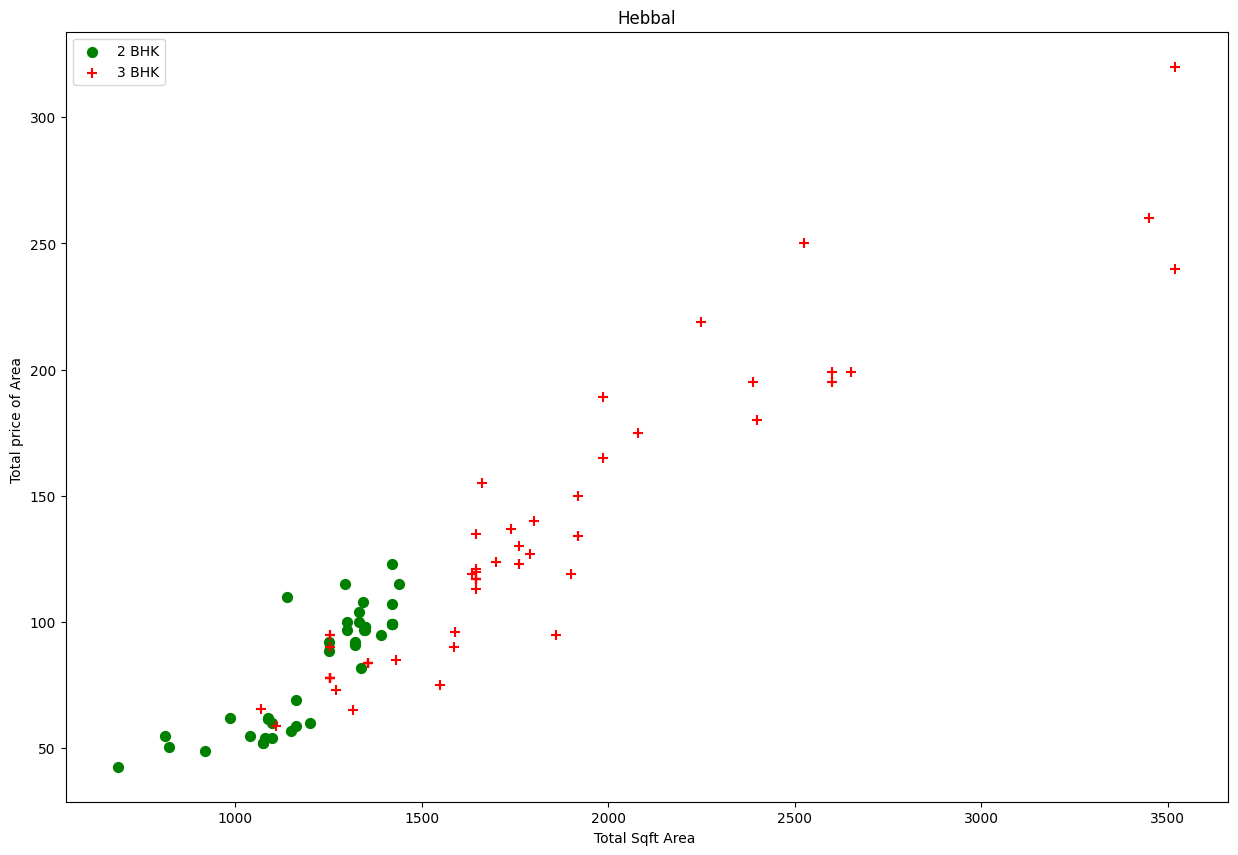

In [130]:
scattor_plot(df7,'Hebbal')

In [131]:
def remove_outlier_bhk(df):
    exclude_idx = set()

    for location, location_df in df.groupby('location'):
        bhk_stats = {}

        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': bhk_df.total_price_perSq.mean(),
                'std': bhk_df.total_price_perSq.std(),
                'count': bhk_df.shape[0]
            }

        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                bad_idx = bhk_df[bhk_df.total_price_perSq < stats['mean']].index
                exclude_idx.update(bad_idx)

    print(f"Total outliers found: {len(exclude_idx)}")
    return df.drop(index=exclude_idx)


In [132]:
df8 = remove_outlier_bhk(df7)
df8.shape

Total outliers found: 2919


(7331, 6)

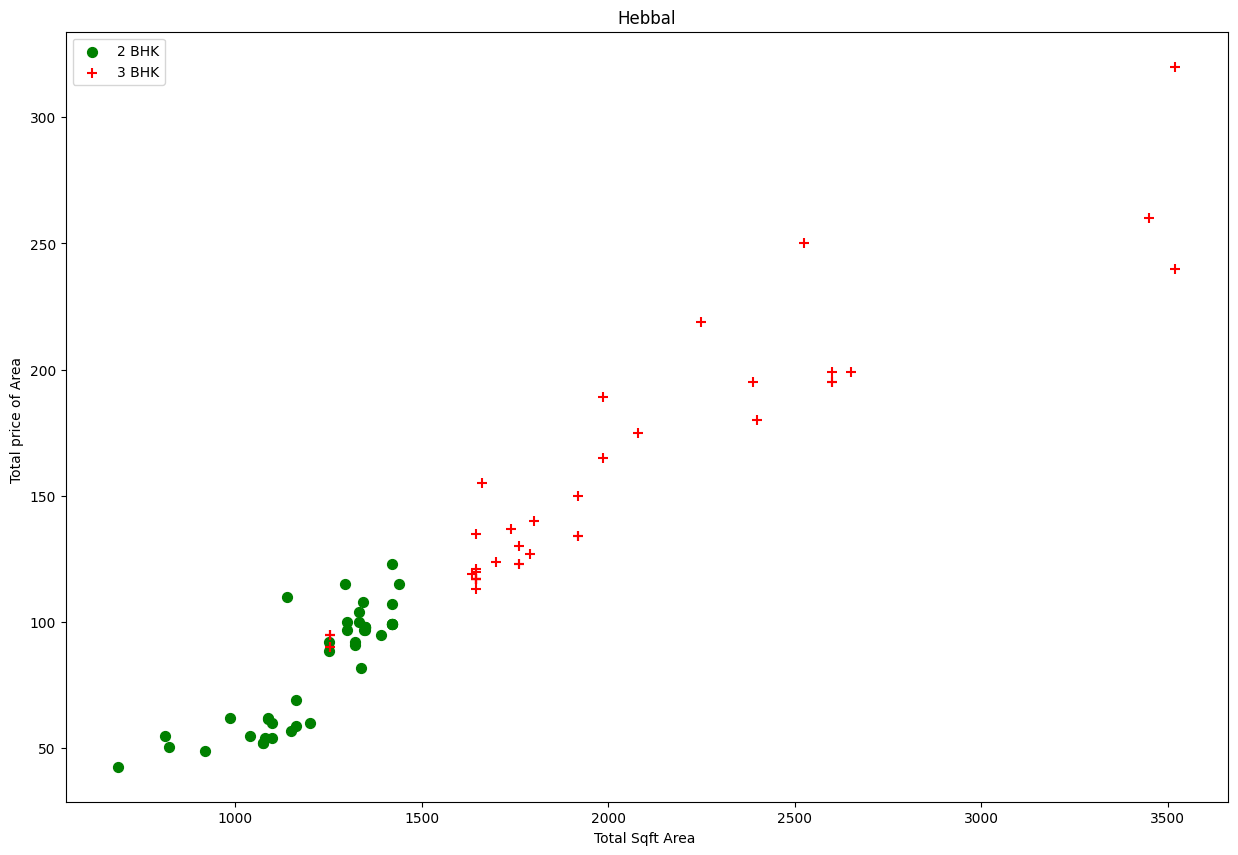

In [133]:
scattor_plot(df8,'Hebbal')


In [134]:
df8.columns

Index(['location', 'bath', 'price', 'bhk', 'total_sqft_numeric',
       'total_price_perSq'],
      dtype='object')

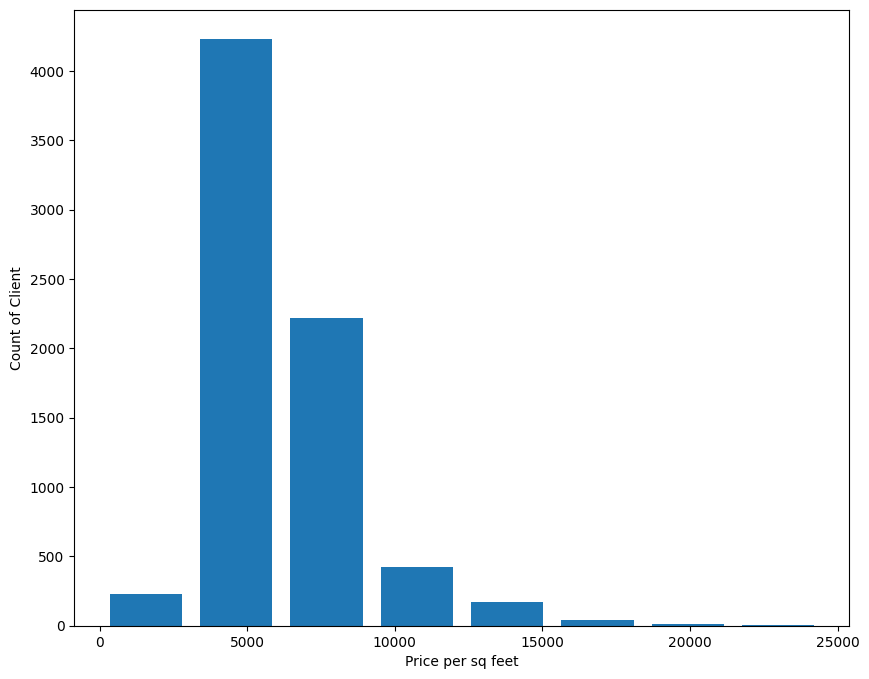

In [135]:
plt.figure(figsize=(10,8))
plt.hist(df8.total_price_perSq,rwidth=0.8,bins=8)
plt.xlabel("Price per sq feet")
plt.ylabel("Count of Client")
plt.show()

In [136]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [137]:
df8[df8.bath >10]

,location,bath,price,bhk,total_sqft_numeric,total_price_perSq
5281,Neeladri Nagar,12.0,160.0,10,4000.0,4000.000000
8493,other,12.0,525.0,10,12000.0,4375.000000
8583,other,16.0,550.0,16,10000.0,5500.000000
9316,other,12.0,150.0,11,6000.0,2500.000000
9647,other,13.0,275.0,13,5425.0,5069.124424


In [138]:
df8[df8.bath>df8.bhk+2]

,location,bath,price,bhk,total_sqft_numeric,total_price_perSq
1629,Chikkabanavar,7.0,80.0,4,2460.0,3252.032520
5242,Nagasandra,8.0,450.0,4,7000.0,6428.571429
6715,Thanisandra,6.0,116.0,3,1806.0,6423.034330
8418,other,9.0,1000.0,6,11338.0,8819.897689


In [139]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7253, 6)

In [140]:
df10=df9.drop(['total_price_perSq'],axis=1)
df10

,location,bath,price,bhk,total_sqft_numeric
0,1st Block Jayanagar,4.0,428.0,4,2850.0
1,1st Block Jayanagar,3.0,194.0,3,1630.0
2,1st Block Jayanagar,2.0,235.0,3,1875.0
3,1st Block Jayanagar,2.0,130.0,3,1200.0
4,1st Block Jayanagar,2.0,148.0,2,1235.0
...,...,...,...,...,...
10241,other,2.0,70.0,2,1200.0
10242,other,1.0,200.0,1,1800.0
10245,other,2.0,110.0,2,1353.0
10246,other,1.0,26.0,1,812.0


In [141]:
dummies=pd.get_dummies(df10.location).astype(int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df11=pd.concat([df10.drop('location',axis=1),dummies.drop('other',axis=1)],axis=1)

In [51]:
df11.head()

,bath,price,bhk,total_sqft_numeric,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,428.0,4,2850.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,194.0,3,1630.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,235.0,3,1875.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,130.0,3,1200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,148.0,2,1235.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Importing the sklearn_testsplit

In [52]:
from sklearn.model_selection import train_test_split

In [142]:
X=df11.drop('price',axis=1)
y=df11['price']

In [143]:
X.head(3)

,bath,bhk,total_sqft_numeric,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,4,2850.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3,1630.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3,1875.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [145]:
from sklearn.linear_model import LinearRegression
linearModel=LinearRegression()

In [146]:
linearModel.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [147]:
linearModel.score(X_test,y_test)

0.5885219381674236

In [62]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)


# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# from sklearn.linear_model import LinearRegression

# model1 = LinearRegression()
# model1.fit(X_train, y_train)
# model1.score(X_test,y_test)

0.5885219381686768

## Implementing KFold

In [148]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7253 entries, 0 to 10249
Columns: 245 entries, bath to Yeshwanthpur
dtypes: float64(3), int64(242)
memory usage: 13.6 MB


In [149]:
# import seaborn as sns
# plt.figure(figsize=(10,8))
# sns.heatmap(df11.corr(), annot=True, cmap='coolwarm')


In [150]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor().fit(X_train, y_train)
print(rf.score(X_test, y_test))

0.7166168404832054


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Base model
rf = RandomForestRegressor(random_state=42)

# Define parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    n_jobs=-1,           # use all CPU cores
    verbose=2,
    scoring='r2'
)

# Fit the grid search on training data
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated R²:", grid_search.best_score_)

# Evaluate on test data
best_rf = grid_search.best_estimator_
print("Test R²:", best_rf.score(X_test, y_test))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [70]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [71]:
cv =ShuffleSplit(n_splits=5,test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.43489687, 0.6499034 , 0.65046393, 0.59127026, 0.6123086 ])

In [72]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
import pandas as pd

def find_Model(X, y):
    algo = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                # 'normalize' is deprecated; use pipeline with StandardScaler instead
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 1, 2, 5],
                'selection': ['random', 'cyclic'],
                'max_iter': [1000, 5000]
            }
        },
        'decisionTree': {
            'model': DecisionTreeRegressor(),
            'params': {
                # 'criterion' updated: 'mse' → 'squared_error'
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random'],
                'max_depth': [None, 5, 10, 20]
            }
        },
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algo.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [73]:

find_Model(X,y)

,model,best_score,best_params
0,linear_regression,0.588465,{'fit_intercept': False}
1,lasso,0.522798,"{'alpha': 0.1, 'max_iter': 1000, 'selection': ..."
2,decisionTree,0.727975,"{'criterion': 'friedman_mse', 'max_depth': Non..."
